# Polynomial Regression:

The root MSE is: 10.120437473614711
The R^2 Score is: 0.8537647164420812


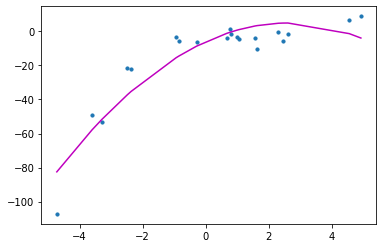

In [25]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("The root MSE is:",rmse)
print("The R^2 Score is:",r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

## Applying polynomial regression to employee dataset:

In [33]:
import pandas as pd
emp = pd.read_csv("employee_data.csv")
emp

#Setting features and labels
features = np.array(emp.iloc[:,2:6])
salary = np.array(emp.iloc[:,[6]])

#Normalizing group
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
features[:,0] = labelencoder_X.fit_transform(features[:,0])
onehotencoder = OneHotEncoder(categorical_features=[0])


#Splitting training and testing groups
from sklearn.model_selection import train_test_split

Features_Train, Features_Test, Salary_Train, Salary_Test = train_test_split(features, salary, test_size=0.2, random_state=0)

#Training model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(Features_Train, Salary_Train)

#Predicting with dataset
Salary_Predicts = LR.predict(Features_Test)

rmse = np.sqrt(mean_squared_error(Salary_Predicts, Salary_Test))
r2 = r2_score(Salary_Predicts, Salary_Test)
print("The root MSE is:",rmse)
print("The R^2 Score is:",r2)

The root MSE is: 390.8825669936576
The R^2 Score is: 0.8386515896422494


In [45]:
#Setting polynomial power to features
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2) #2nd degree

Poly1 = polynomial_features.fit_transform(features[:,2].reshape(-1, 1))[:,1:]
Poly2 = polynomial_features.fit_transform(features[:,3].reshape(-1, 1))[:,1:]

poly_features = np.concatenate((Poly1, Poly2), axis=1)
poly_features = np.concatenate((features[:,[0,1]], poly_features), axis=1)

In [47]:
#Splitting training and testing groups
from sklearn.model_selection import train_test_split

Features_Train, Features_Test, Salary_Train, Salary_Test = train_test_split(poly_features, salary, test_size=0.2, random_state=0)

#Training model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(Features_Train, Salary_Train)

#Predicting with dataset
Salary_Predicts = LR.predict(Features_Test)

rmse = np.sqrt(mean_squared_error(Salary_Predicts, Salary_Test))
r2 = r2_score(Salary_Predicts, Salary_Test)
print("The root MSE is:",rmse)
print("The R^2 Score is:",r2)

The root MSE is: 314.3019350772437
The R^2 Score is: 0.8903618583090745
